In [1]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/home/samir/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from PIL import Image
images = []
images.append(Image.open("/home/samir/Desktop/ARIMA/colab/server/warehouse/instagram/posts/48912154907/2024-02-17_05-20-55_UTC.jpg"))

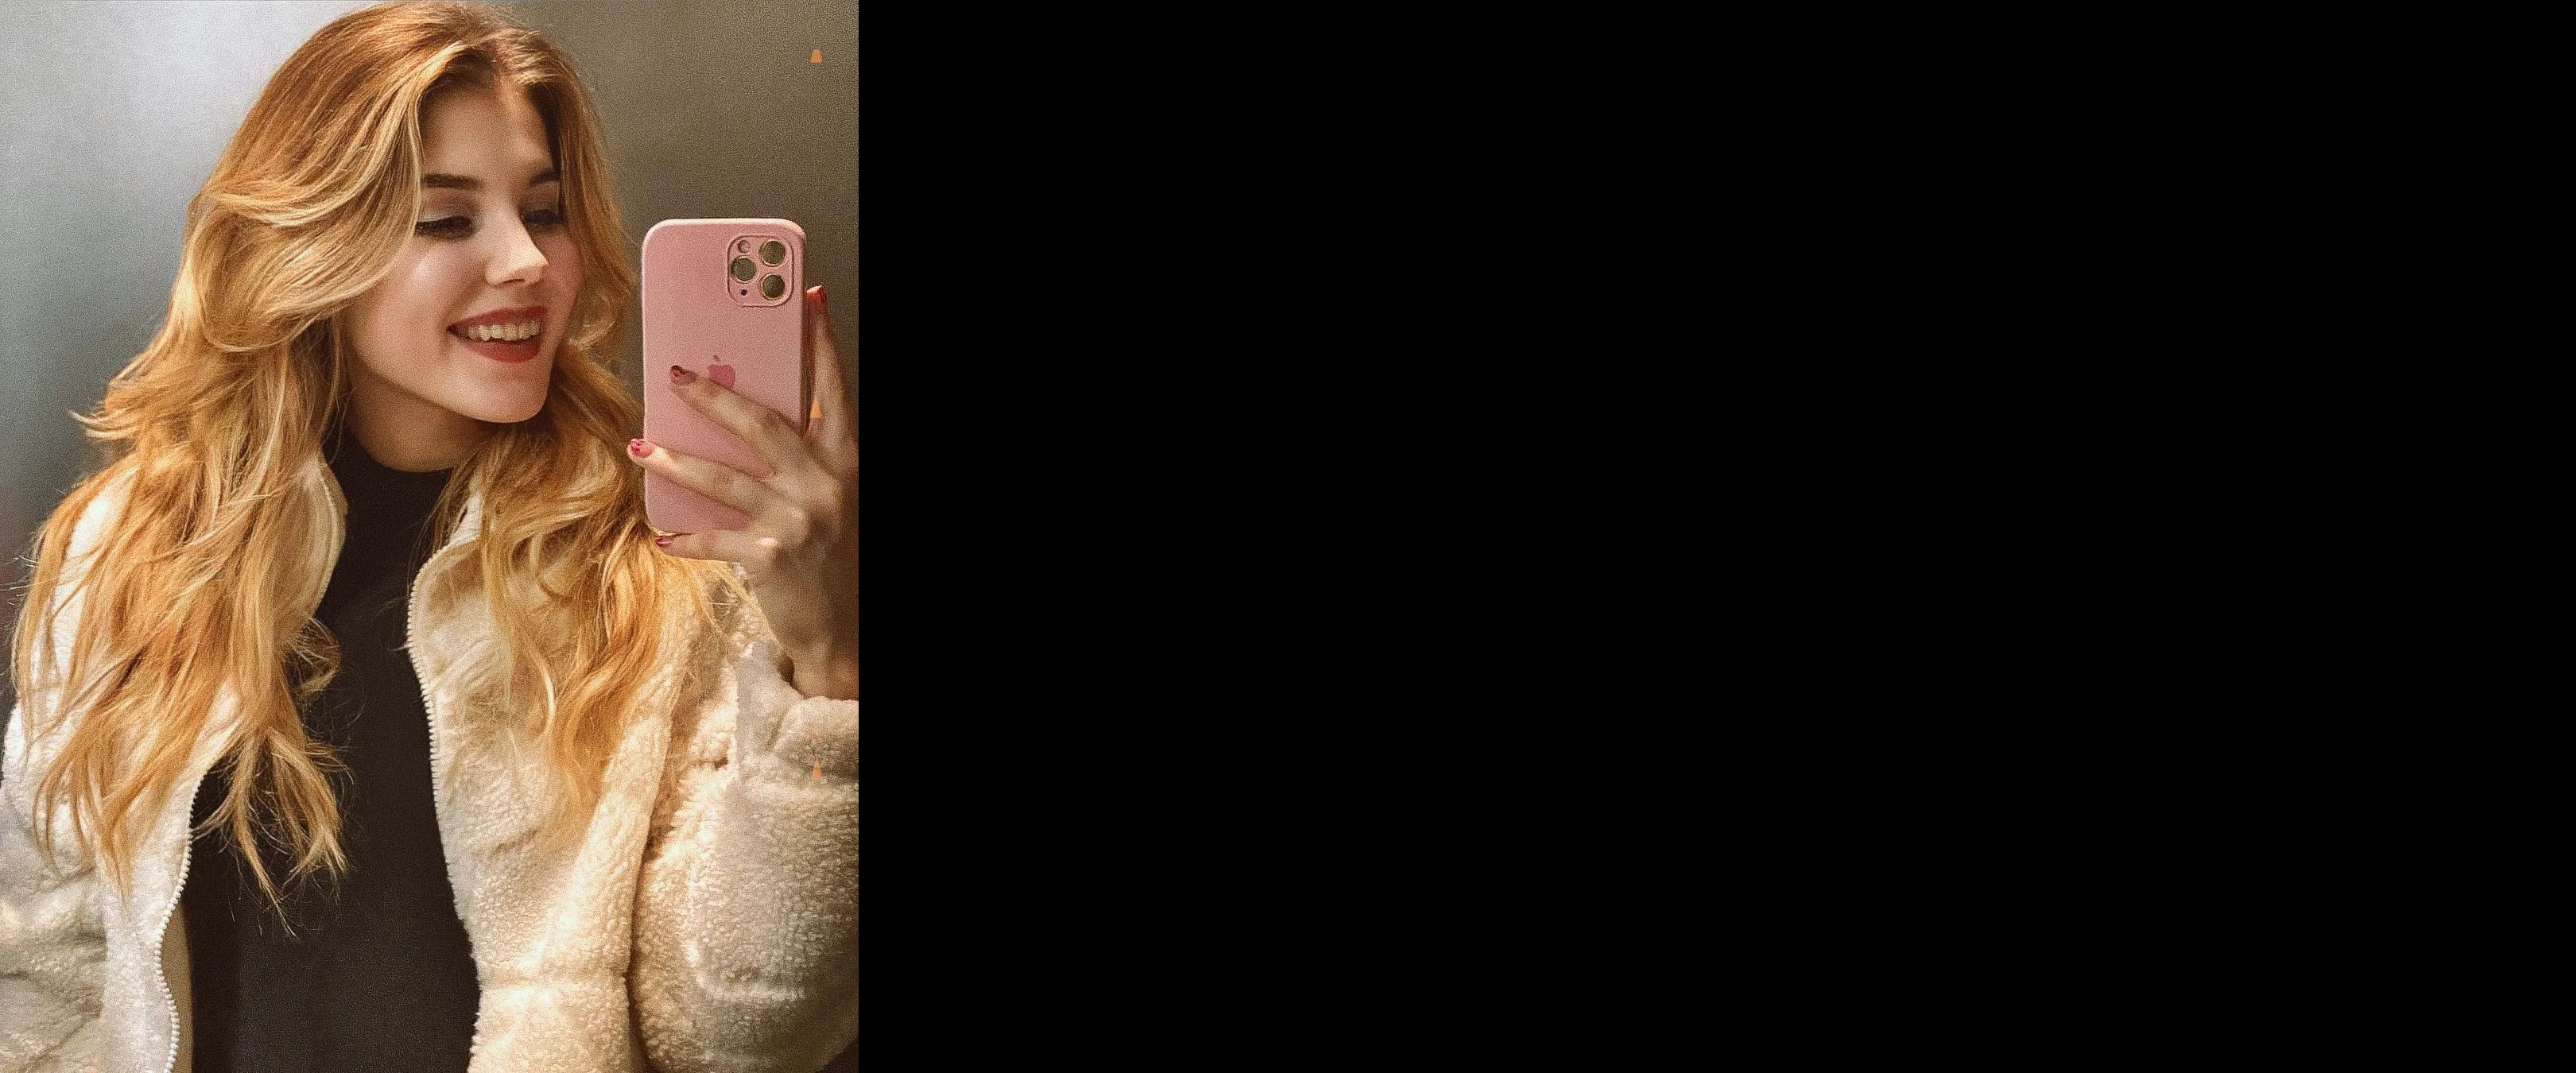

In [3]:

def image_grid(imgs, cols):
    rows = (len(imgs) + cols - 1) // cols
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

grid = image_grid(images, cols=3)
display(grid)

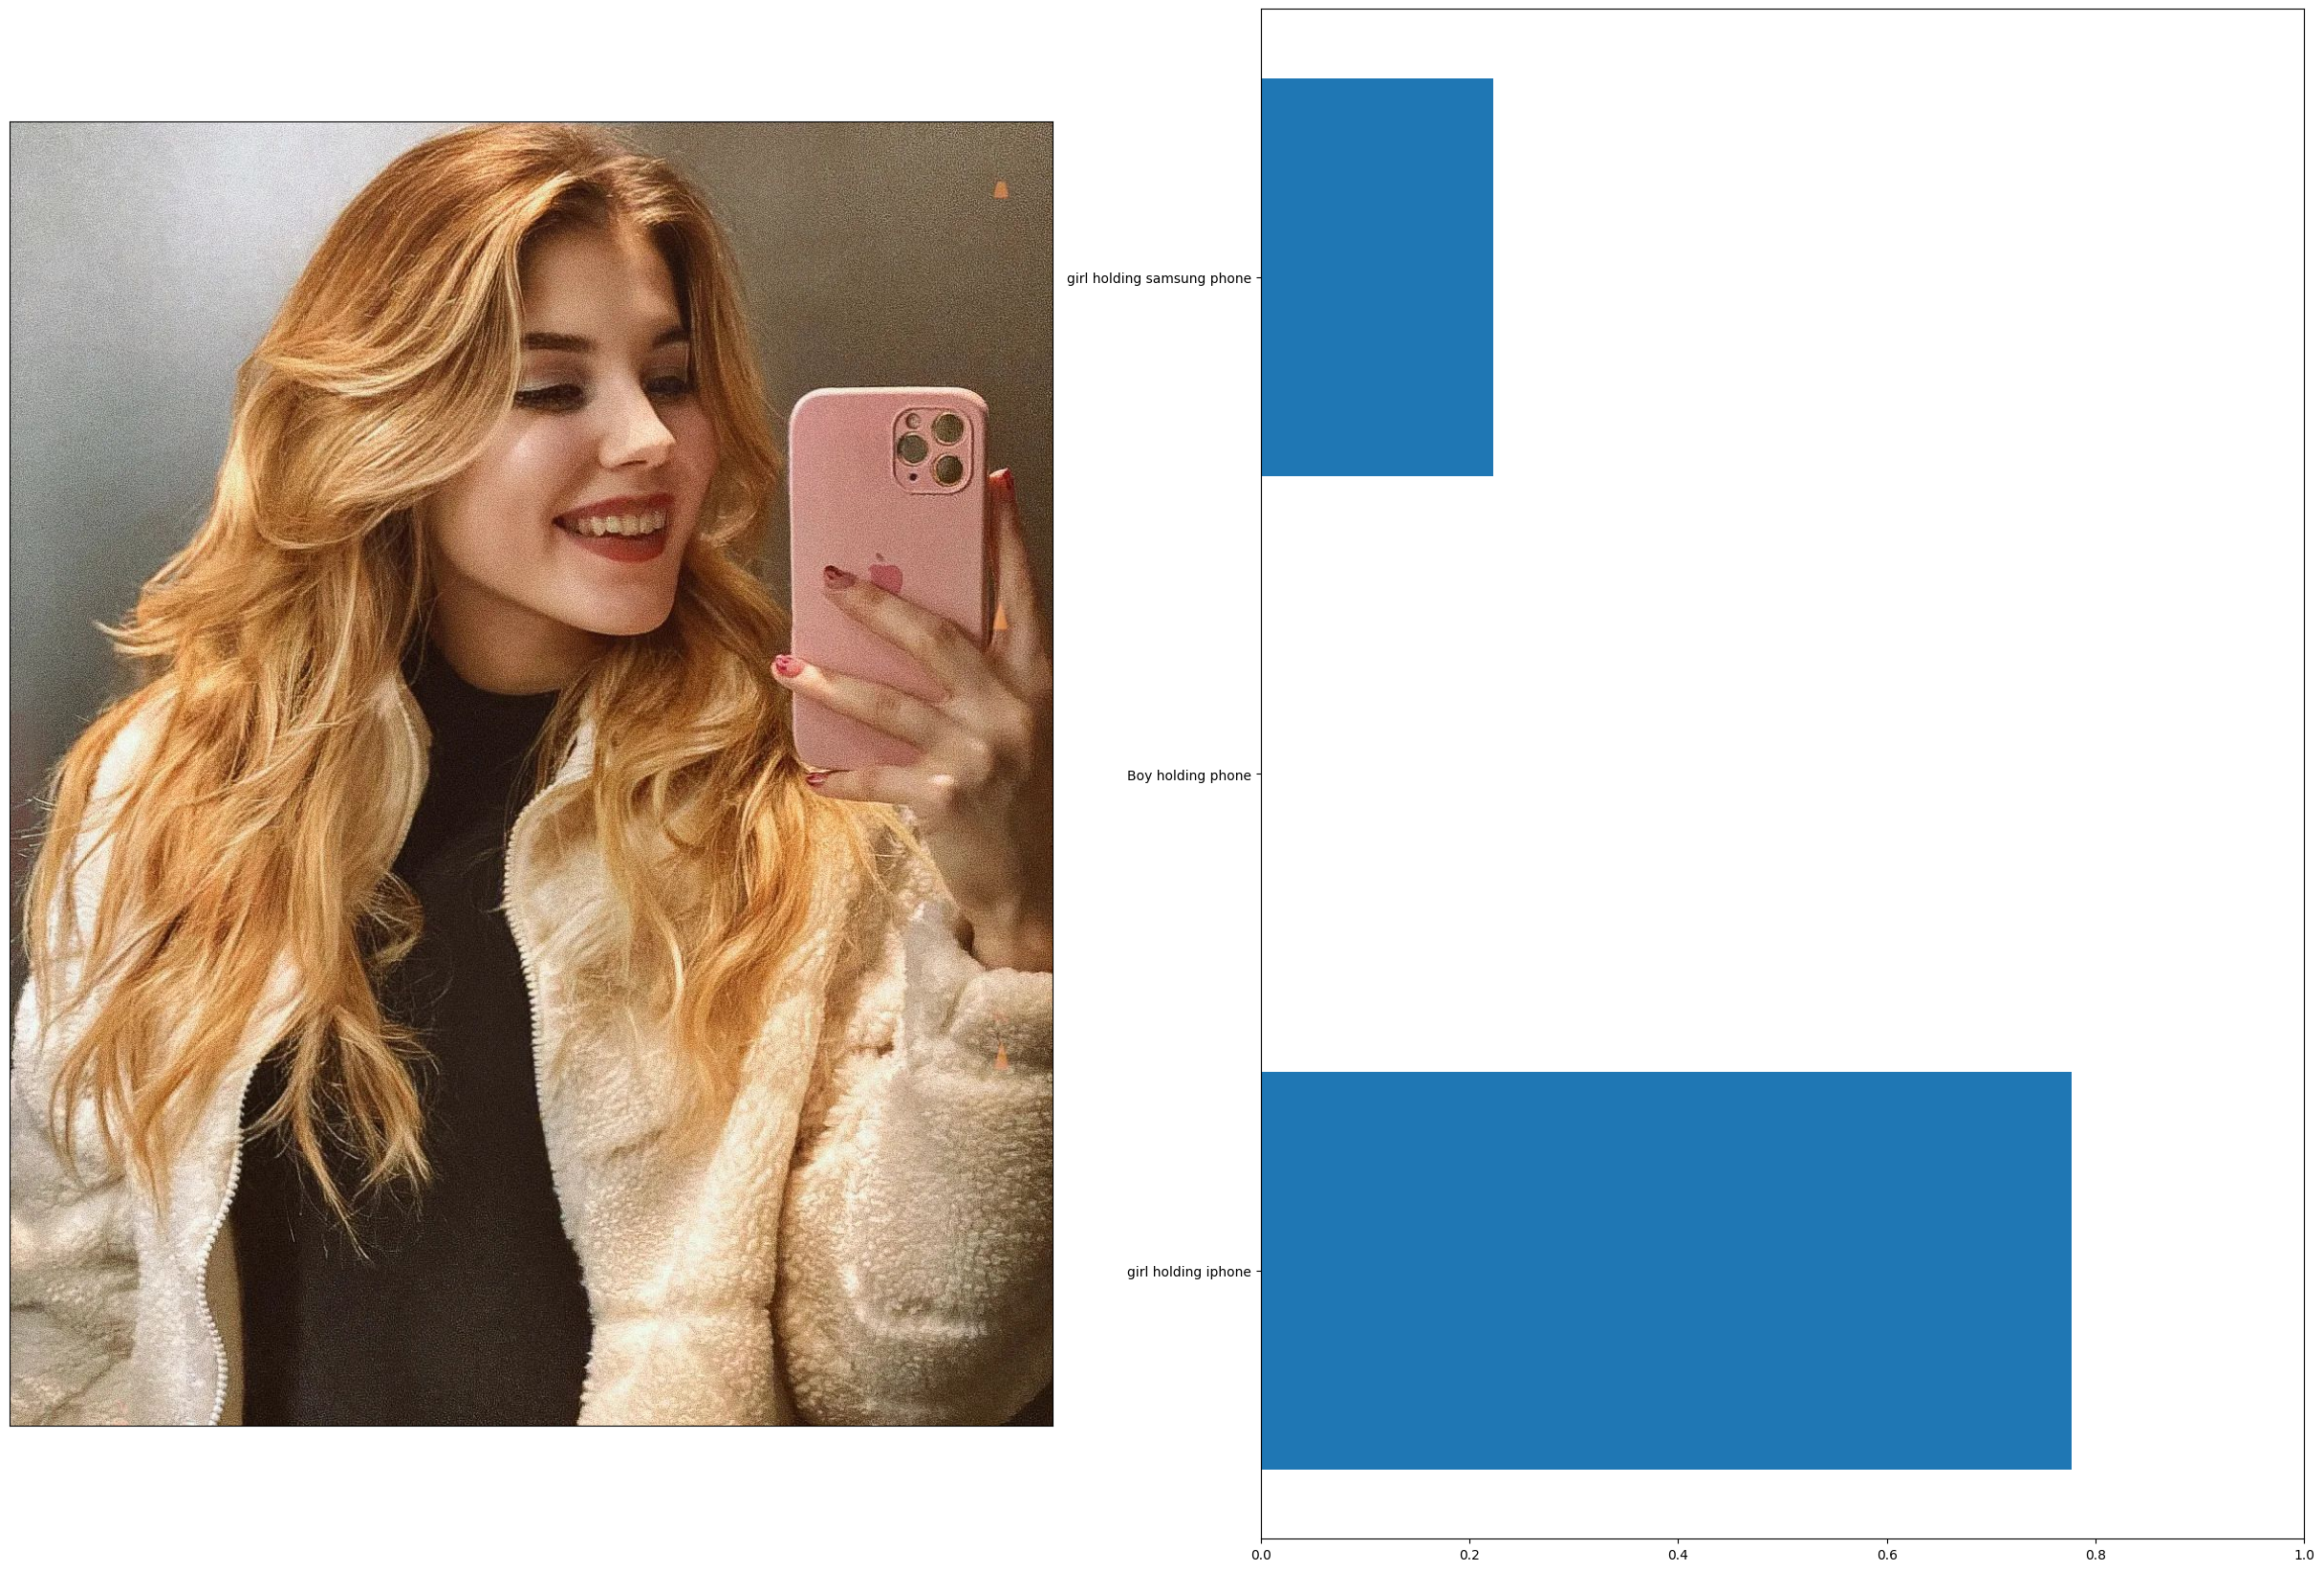

In [4]:
# %% Zero-shot classification
classes = ['girl holding iphone', 'Boy holding phone', 'girl holding samsung phone']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

# %% Display classification results

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 20))

for idx in range(len(images)):

    # show original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1 )
    plt.imshow(images[idx])
    plt.xticks([])
    plt.yticks([])

    # show probabilities
    fig.add_subplot(len(images), 2, 2*(idx+1))
    plt.barh(range(len(probs[0].detach().numpy())),probs[idx].detach().numpy(), tick_label=classes)
    plt.xlim(0,1.0)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.8)

plt.show()

In [5]:
import nltk
from nltk.corpus import wordnet
import random

def generate_random_test_sentences(seed_text, half_size=5):
    # Tokenize the seed text
    seed_tokens = nltk.word_tokenize(seed_text)

    # Generate a random number of similar and dissimilar sentences
    num_similar = random.randint(1, half_size)  # You can adjust the range as needed
    num_dissimilar = random.randint(1, half_size)  # You can adjust the range as needed

    # Initialize a list to store all sentences
    all_sentences = []

    # Generate similar sentences
    for _ in range(num_similar):
        similar_sentence = " ".join([get_synonym(token) for token in seed_tokens])
        all_sentences.append(similar_sentence)

    # Generate dissimilar sentences
    for _ in range(num_dissimilar):
        dissimilar_sentence = get_random_sentence()
        all_sentences.append(dissimilar_sentence)

    # Shuffle the list of sentences
    random.shuffle(all_sentences)

    return all_sentences

def get_synonym(word):
    # Get synonyms for the word from WordNet
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())

    # Select a random synonym
    if synonyms:
        return random.choice(synonyms)
    else:
        return word

def get_random_sentence():
    # Generate a random sentence with some random words
    random_sentence = " ".join([get_random_word() for _ in range(random.randint(3, 6))])  # Randomly select the number of words
    return random_sentence

def get_random_word():
    # Get a random word from WordNet
    synset = list(wordnet.all_synsets())  # Convert generator to list
    random_synset = random.choice(synset)
    return random.choice(random_synset.lemmas()).name()

# Example usage
seed_text = "person holding phone"
random_sentences = generate_random_test_sentences(seed_text)

print("Random Sentences:")
for sentence in random_sentences:
    print(sentence)


/home/samir/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import nltk
from nltk.corpus import wordnet
import random

def generate_random_test_sentences(seed_text, half_size=3):
    # Tokenize the seed text
    seed_tokens = nltk.word_tokenize(seed_text)

    # Generate a random number of similar and dissimilar sentences
    num_similar = random.randint(1, half_size)  # You can adjust the range as needed
    num_dissimilar = random.randint(1, half_size)  # You can adjust the range as needed

    # Initialize a list to store all sentences
    all_sentences = []

    # Generate similar sentences
    for _ in range(num_similar):
        similar_sentence = " ".join([get_synonym(token) for token in seed_tokens])
        all_sentences.append(similar_sentence)

    # Generate dissimilar sentences
    for _ in range(num_dissimilar):
        dissimilar_sentence = get_random_sentence()
        all_sentences.append(dissimilar_sentence)

    # Shuffle the list of sentences
    random.shuffle(all_sentences)

    return all_sentences

def get_synonym(word):
    # Get synonyms for the word from WordNet
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())

    # Select a random synonym
    if synonyms:
        return random.choice(synonyms).replace('_', ' ')
    else:
        return word

def get_random_sentence():
    # Generate a random sentence with some random words
    random_sentence = " ".join([get_random_word().replace('_', ' ') for _ in range(random.randint(3, 6))])  # Randomly select the number of words
    return random_sentence

def get_random_word():
    # Get a random word from WordNet
    synset = list(wordnet.all_synsets())  # Convert generator to list
    random_synset = random.choice(synset)
    random_lemma = random.choice(random_synset.lemmas())
    return random_lemma.name()

# Example usage
seed_text = "person peeping out"
random_sentences = generate_random_test_sentences(seed_text)

print("Random Sentences:")
for sentence in random_sentences:
    print(sentence)


Random Sentences:
suppress arteria labialis superior John Brown
person cheep out
biosafety level 3 prang up worthlessly Corona Borealis in and of itself
lens cover beetle seel anarchic


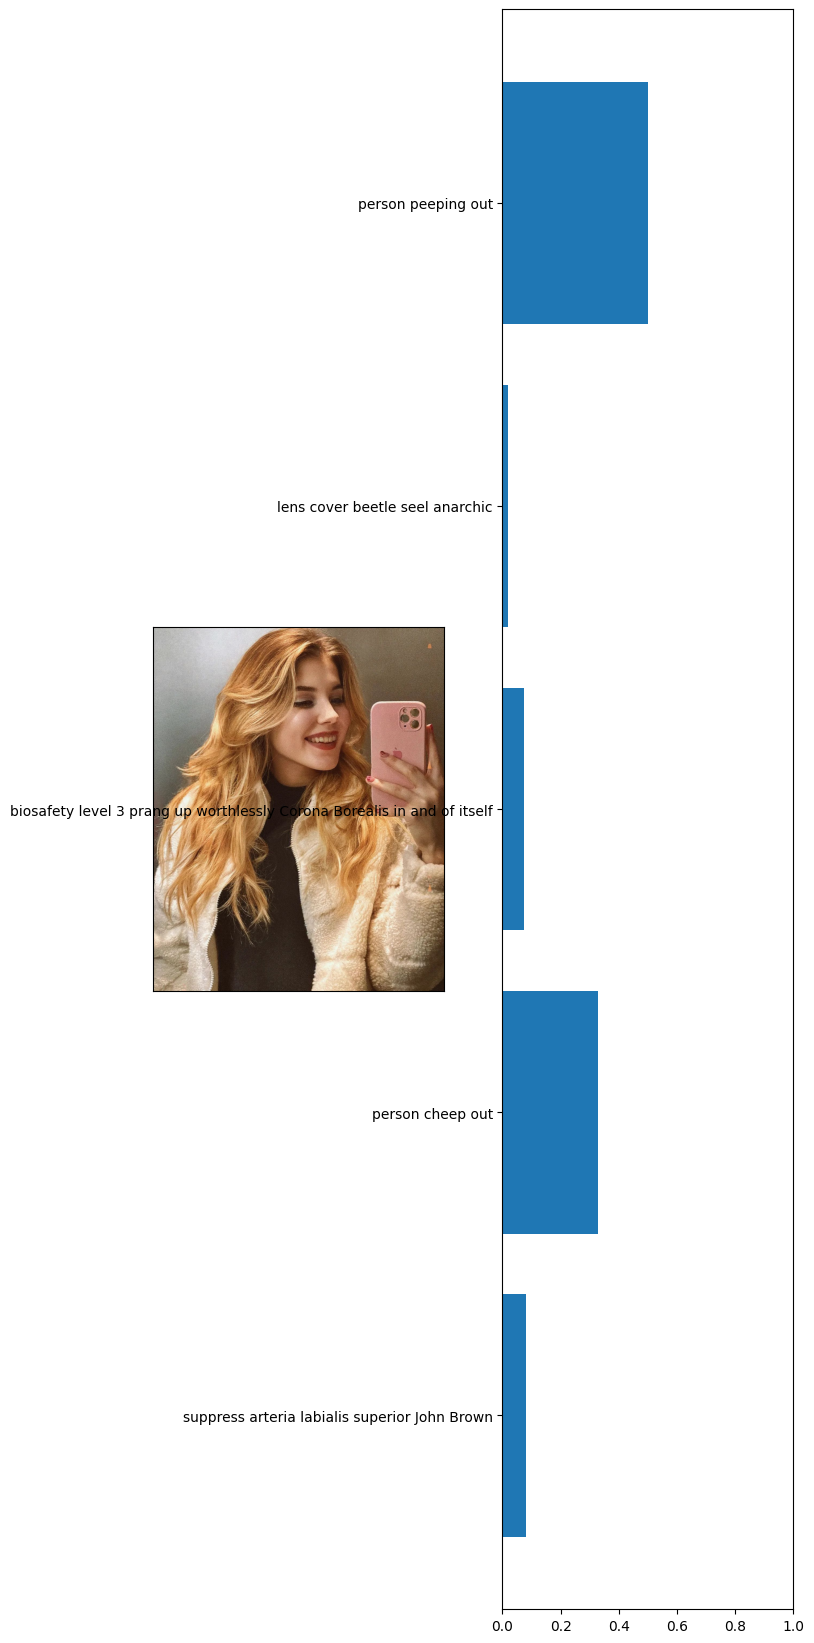

In [ ]:
# %% Zero-shot classification
classes = random_sentences + [seed_text]
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

# %% Display classification results

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

for idx in range(len(images)):

    # show original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1 )
    plt.imshow(images[idx])
    plt.xticks([])
    plt.yticks([])

    # show probabilities
    fig.add_subplot(len(images), 2, 2*(idx+1))
    plt.barh(range(len(probs[0].detach().numpy())),probs[idx].detach().numpy(), tick_label=classes)
    plt.xlim(0,1.0)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.8)

plt.show()